In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


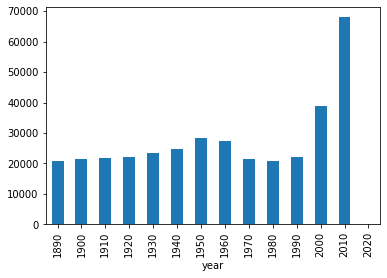

In [4]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t['year'].mod(10)).size().plot(kind='bar')
t.groupby(t['year'] // 10 * 10).size().plot(kind='bar')

In [5]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c['year'] // 10 == 195]
c = c[c['n'] == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      626
      actress    281
1951  actor      647
      actress    281
1952  actor      607
      actress    293
1953  actor      652
      actress    301
1954  actor      634
      actress    310
1955  actor      641
      actress    281
1956  actor      643
      actress    305
1957  actor      735
      actress    301
1958  actor      710
      actress    295
1959  actor      721
      actress    317
dtype: int64

In [6]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c['title'] == 'The Pink Panther']
c = c.sort_values('n').groupby('year')['n'].max()
c

year
1963    15.0
2006    50.0
Name: n, dtype: float64

In [7]:

# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c['name'] == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64